In [1]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np

In [2]:
inpath = '/cmnfs/proj/bmpc_dlomix/datasets/parquet/noptm_baseline_small'
dataset1 = pd.read_parquet(f'{inpath}_train.parquet')

In [3]:
dataset2 = pd.read_parquet('/cmnfs/proj/oktoberfest/ETD_Support/02445d_BA1-TUM_HLA_1_01_01-ETD-1h-R4.parquet')
# dataset2 = pd.read_parquet("/cmnfs/home/students/j.schlensok/oktoberfest/tutorials/out/data/dlomix/refinement_dataset/processed_dataset.parquet")
dataset2 = pd.read_parquet("/nfs/home/students/l.willruth/mapra/ce_calibration_out/data/dlomix/refinement_dataset/processed_dataset.parquet")

In [4]:
dataset1

,raw_file,scan_number,method_nbr,precursor_charge_onehot,collision_energy_aligned_normed,intensities_raw,package,modified_sequence,sub
0,01640c_BA2-Thermo_SRM_Pool_9_01_01-2xIT_2xHCD-...,29024,2,"[0, 1, 0, 0, 0, 0]",0.223670,"[0.2857142857142857, 0.0, -1.0, 0.0, 0.0, -1.0...",Thermo_SRM_Pool_9,[]-TGQFDSQEYTEYAVK-[],0.0
1,03036a_BB12-TUM_HLA2_120_01_01-DDA-1h-R1,24650,2,"[0, 0, 1, 0, 0, 0]",0.312461,"[0.66, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0...",TUM_HLA2_122_01,[]-AHPKLVFSQEGRY-[],0.0
2,02445d_BH9-TUM_HLA_93_01_01-2xIT_2xHCD-1h-R4,10628,2,"[0, 1, 0, 0, 0, 0]",0.216905,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.25, 0.0, -1...",TUM_HLA_93_01,[]-NEEPKVATA-[],0.0
3,02445d_BF9-TUM_HLA_69_01_01-2xIT_2xHCD-1h-R4,49207,2,"[0, 1, 0, 0, 0, 0]",0.231191,"[0.04, 0.0, -1.0, 0.0, 0.0, -1.0, 0.04, 0.0, -...",TUM_HLA_69_01,[]-WPEAWRQQL-[],0.0
4,01812a_GG1-TUM_second_pool_91_01_01-3xHCD-1h-R1,51757,2,"[0, 0, 1, 0, 0, 0]",0.273261,"[0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",TUM_first_pool_105,[]-SDLEANVEALTQEIDFLRR-[],0.0
...,...,...,...,...,...,...,...,...,...
7995,01640c_BD2-Thermo_SRM_Pool_12_01_01-3xHCD-1h-R2,55210,2,"[0, 1, 0, 0, 0, 0]",0.372297,"[0.51, 0.0, -1.0, 0.0, 0.0, -1.0, 0.5, 0.0, -1...",Thermo_SRM_Pool_12,[]-EELSGSLLQSVQEALEER-[],0.0
7996,02097a_BF7-TUM_isoform_67_01_01-3xHCD-1h-R3,32437,2,"[0, 0, 0, 1, 0, 0]",0.266420,"[0.22, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0,...",TUM_isoform_67_01,[]-PLLGSLRHMAPIR-[],0.0
7997,02445b_BG5-TUM_HLA_77_01_01-3xHCD-1h-R4,22717,2,"[0, 0, 1, 0, 0, 0]",0.283213,"[0.01, 0.0, 0.0, 0.03, 0.0, 0.0, 0.24, 0.0, 0....",TUM_HLA_77_01,[]-RPASPPVVKL-[],0.0
7998,01717a_BF2-TUM_second_pool_26_01_01-DDA-1h-R1,12543,2,"[0, 0, 1, 0, 0, 0]",0.325728,"[0.67, 0.0, 0.0, 0.0, 0.0, 0.0, 0.32, 0.0, 0.0...",TUM_second_pool_26,[]-EIPEVKDEEK-[],0.0


In [5]:
dataset2

,modified_sequence,precursor_charge_onehot,collision_energy_aligned_normed,method_nbr,intensities_raw,sequence,raw_file,scan_number
0,AADSPR[UNIMOD:7]PGDWILER,"[0, 1, 0, 0, 0, 0]",18,1,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....",AADSPRPGDWILER,02207a_GA10-TUM_mod_citrullination_l_10_01_01-...,45454
1,AADSPR[UNIMOD:7]PGDWILER,"[0, 1, 0, 0, 0, 0]",18,2,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....",AADSPRPGDWILER,02207a_GA10-TUM_mod_citrullination_l_10_01_01-...,45455
2,AADSPR[UNIMOD:7]PGDWILER,"[0, 1, 0, 0, 0, 0]",18,2,"[0.03851208917060039, 0.0, -1.0, 0.0, 0.0, -1....",AADSPRPGDWILER,02207a_GA10-TUM_mod_citrullination_l_10_01_01-...,45456
3,AADSPR[UNIMOD:7]PGDWILER,"[0, 1, 0, 0, 0, 0]",18,2,"[0.051773361116773726, 0.0, -1.0, 0.0, 0.0, -1...",AADSPRPGDWILER,02207a_GA10-TUM_mod_citrullination_l_10_01_01-...,45457
4,AADSPR[UNIMOD:7]PGDWILER,"[0, 1, 0, 0, 0, 0]",18,1,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....",AADSPRPGDWILER,02207a_GA10-TUM_mod_citrullination_l_10_01_01-...,45495
...,...,...,...,...,...,...,...,...
27148,YVGR[UNIMOD:7]TFIEPDM[UNIMOD:35]RLR,"[0, 0, 1, 0, 0, 0]",18,2,"[0.013124908695560478, 0.0, 0.0, 0.0, 0.0, 0.0...",YVGRTFIEPDMRLR,02207a_GA10-TUM_mod_citrullination_l_10_01_01-...,37003
27149,YVGR[UNIMOD:7]TFIEPDM[UNIMOD:35]RLR,"[0, 0, 1, 0, 0, 0]",18,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",YVGRTFIEPDMRLR,02207a_GA10-TUM_mod_citrullination_l_10_01_01-...,37070
27150,YVGR[UNIMOD:7]TFIEPDM[UNIMOD:35]RLR,"[0, 0, 1, 0, 0, 0]",18,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",YVGRTFIEPDMRLR,02207a_GA10-TUM_mod_citrullination_l_10_01_01-...,37071
27151,YVGR[UNIMOD:7]TFIEPDM[UNIMOD:35]RLR,"[0, 0, 1, 0, 0, 0]",18,2,"[0.017110848435929794, 0.0, 0.0, 0.0, 0.0, 0.0...",YVGRTFIEPDMRLR,02207a_GA10-TUM_mod_citrullination_l_10_01_01-...,37072


In [6]:
dataset2.describe()

,collision_energy_aligned_normed,method_nbr,scan_number
count,27149.0,27149.000000,27149.000000
mean,18.0,1.721831,31355.303731
std,0.0,0.448105,16334.226554
min,18.0,1.000000,77.000000
25%,18.0,1.000000,16915.000000
50%,18.0,2.000000,31939.000000
75%,18.0,2.000000,45251.000000
max,18.0,2.000000,64159.000000


In [7]:
dataset2.shape

(27149, 8)

In [8]:
def count_nans(lst):
    return sum(1 for x in lst if pd.isna(x))

In [9]:
ds1_nans = [count_nans(l) for l in dataset1["intensities_raw"]]

In [10]:
ds2_nans = [count_nans(l) for l in dataset2["intensities_raw"]]

In [11]:
sum(ds1_nans)

0

In [12]:
sum(ds2_nans)

0

In [13]:
def count_zeros_and_minus_ones(lst):
    return sum(1 for x in lst if x == 0 or x == -1)

In [14]:
ds1 = [count_zeros_and_minus_ones(l) for l in dataset1["intensities_raw"]]


In [15]:
ds2 = [count_zeros_and_minus_ones(l) for l in dataset2["intensities_raw"]]

In [16]:
np.mean(ds1)

154.273375

In [17]:
np.mean(ds2)

163.7123650963203

In [18]:
def all_zeros_or_minus_ones(lst):
    return all(x in [0, -1] for x in lst)


In [19]:
ds1 = [all_zeros_or_minus_ones(l) for l in dataset1["intensities_raw"]]
ds2 = [all_zeros_or_minus_ones(l) for l in dataset2["intensities_raw"]]


In [20]:
sum(ds1)

0

In [21]:
sum(ds2)

399

In [22]:
def count_non_zero_minus_ones(lst):
    return sum(1 for x in lst if x != 0 and x != -1)


In [33]:
dataset1['non_zero_minus_ones_count'] = dataset1['intensities_raw'].apply(count_non_zero_minus_ones)
dataset2['non_zero_minus_ones_count'] = dataset2['intensities_raw'].apply(count_non_zero_minus_ones)

# Calculate the means
mean1 = dataset1['non_zero_minus_ones_count'].mean()
mean2 = dataset2['non_zero_minus_ones_count'].mean()

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

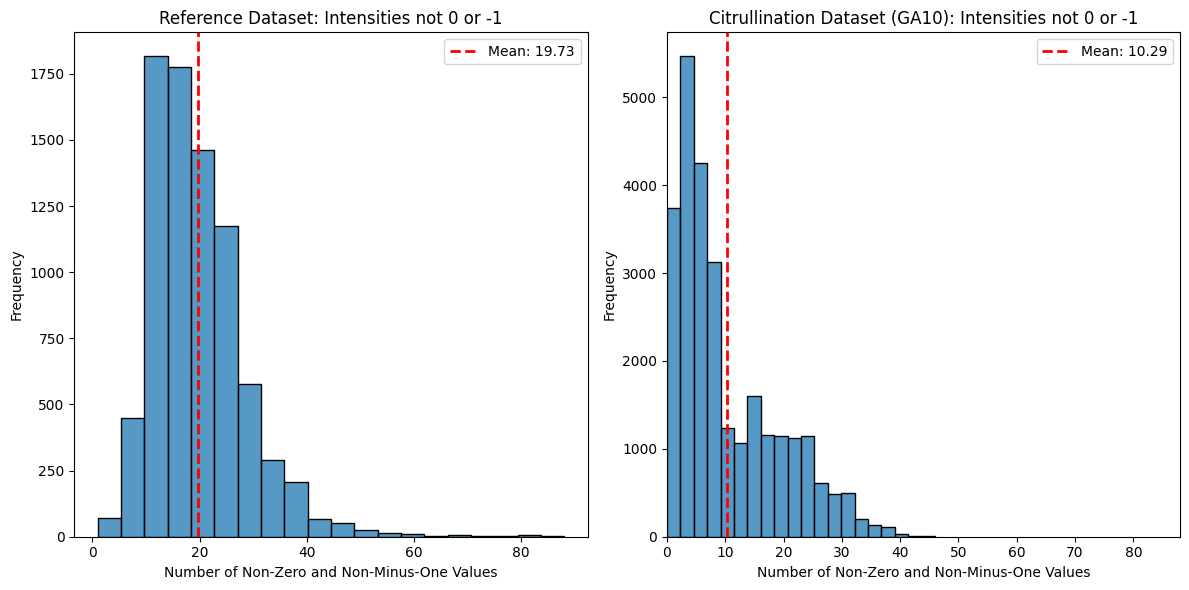

In [39]:
# Plotting the histograms together
plt.figure(figsize=(12, 6))

# Histogram for dataset1
plt.subplot(1, 2, 1)
sns.histplot(dataset1['non_zero_minus_ones_count'], bins=20, kde=False)
plt.axvline(mean1, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean1:.2f}')
plt.title('Reference Dataset: Intensities not 0 or -1')
plt.xlabel('Number of Non-Zero and Non-Minus-One Values')
plt.ylabel('Frequency')
plt.legend()

# Histogram for dataset2
plt.subplot(1, 2, 2)
sns.histplot(dataset2['non_zero_minus_ones_count'], bins=20, kde=False)
plt.axvline(mean2, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean2:.2f}')
plt.title('Citrullination Dataset (GA10): Intensities not 0 or -1')
plt.xlabel('Number of Non-Zero and Non-Minus-One Values')
plt.ylabel('Frequency')
plt.legend()

# Ensure common scale on x-axis
plt.xlim(min(dataset1['non_zero_minus_ones_count'].min(), dataset2['non_zero_minus_ones_count'].min()),
         max(dataset1['non_zero_minus_ones_count'].max(), dataset2['non_zero_minus_ones_count'].max()))

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

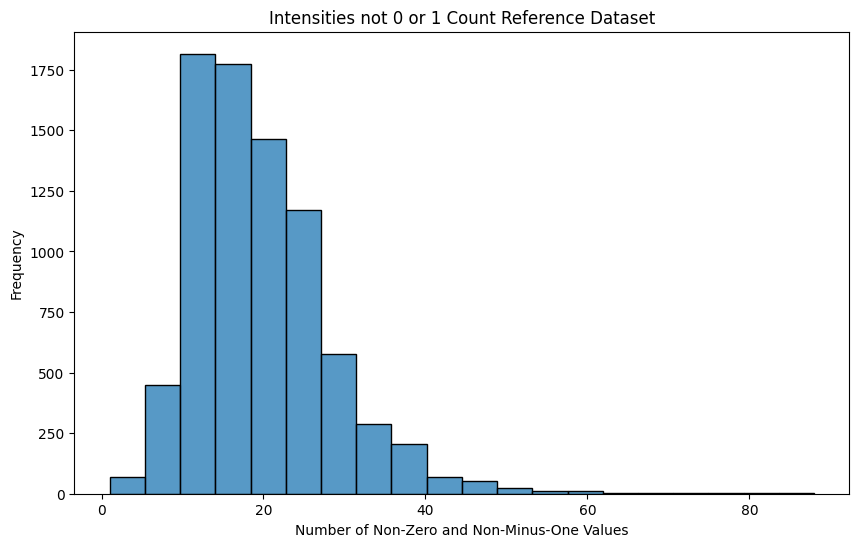

In [40]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset1['non_zero_minus_ones_count'], bins=20, kde=False)

plt.title('Intensities not 0 or 1 Count Reference Dataset')
plt.xlabel('Number of Non-Zero and Non-Minus-One Values')
plt.ylabel('Frequency')
plt.show()


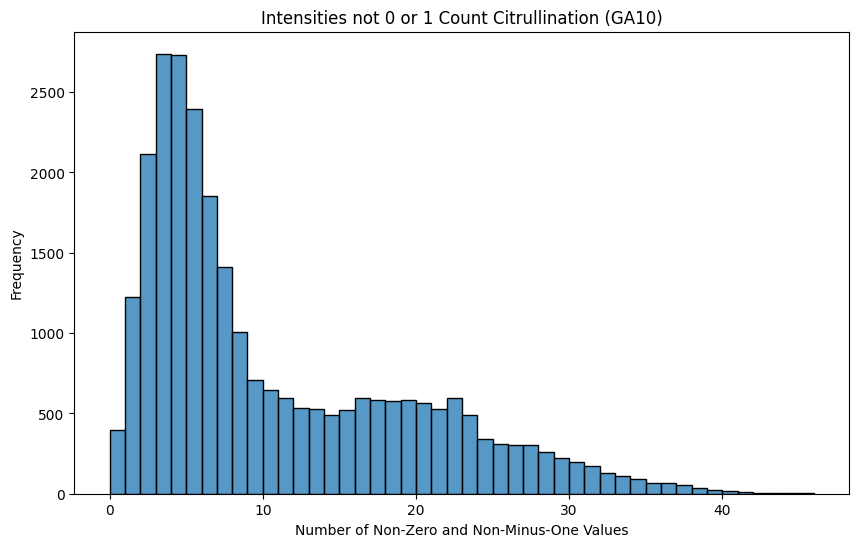

In [42]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset2['non_zero_minus_ones_count'], binwidth=1, kde=False)

plt.title('Intensities not 0 or 1 Count Citrullination (GA10)')
plt.xlabel('Number of Non-Zero and Non-Minus-One Values')
plt.ylabel('Frequency')
plt.show()